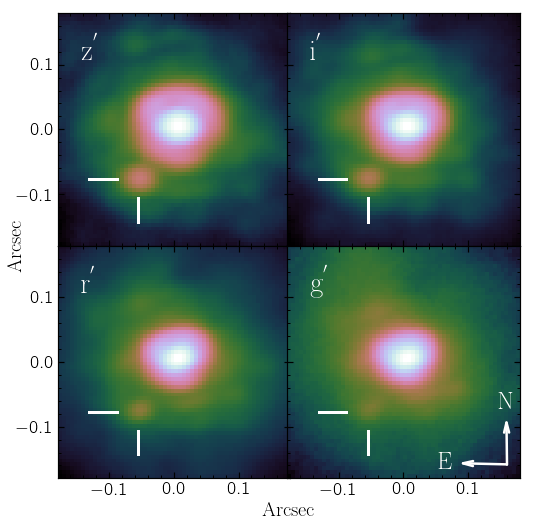

In [1]:
from astropy.visualization import MinMaxInterval, ImageNormalize, LogStretch
from astropy.io import fits

filters = ['z','i','r','g']
filt = 'z'
im = fits.getdata(filt+'_bkgdsubbed.fits')

cmap = 'cubehelix'

box = im.shape[0]*0.5
center = [box,box]
extent = np.array([-center[0], center[0], -center[1], center[1]]) * 0.006

xcc, ycc = 255.5 - 245.28, 255.5 - 241.72

%matplotlib inline

plt.style.use('magrathea')
fig, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(8,7.7))
axouter = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
#plt.xticks(fontsize=25)
#plt.yticks(fontsize=25)
plt.xlabel("Arcsec")
plt.ylabel("Arcsec")

count = 0
for i in range(2):
    for j in range(2):
        f = filters[count]
        im = fits.getdata(f+'_bkgdsubbed.fits')
        interval = MinMaxInterval()
        vmin, vmax = interval.get_limits(im)
        ax = axes[i][j]
        x = ax.imshow(im, norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch()), 
                      cmap=cmap, extent = extent)
        ax.annotate(""+f+"$^{'}$", xy=(0.1,0.8), xycoords='axes fraction', color='w', fontsize=30)
        #ax.axes.get_xaxis().set_visible(False)
        #ax.axes.get_yaxis().set_visible(False)
        count+=1
        
        ax.plot(np.array([xcc-32,xcc-25])*0.006,np.array([-ycc+1,-ycc+1])*0.006,color='w',lw=3)
        ax.plot(np.array([-xcc+1,-xcc+1])*0.006,np.array([-ycc-4,-ycc-10])*0.006,color='w',lw=3)
        
axes[1][1].annotate('N',
                    xy=(0.945,0.05), xycoords='axes fraction',
                    xytext=(0.905,0.3), textcoords='axes fraction',
                    arrowprops=dict(arrowstyle="<-, head_width=0.1", color='white', lw=2.5), color='white', 
                     fontsize = 25)
axes[1][1].annotate('E',
                xy=(0.95,0.06), xycoords='axes fraction',
                xytext=(0.65,0.04), textcoords='axes fraction',
                arrowprops=dict(arrowstyle="<-, head_width=0.1", color='white', lw=2.5), color='white', 
                 fontsize = 25)



plt.tight_layout(w_pad = 0.7, h_pad=0)
#plt.savefig('four-filter-image.png', dpi=300, bbox_inches='tight')

In [90]:
xcc, ycc = 255.5 - 245.28, 255.5 - 241.72

-0.05868000000000001
0.18
[-0.05868  0.03132] [0.08268 0.08268]


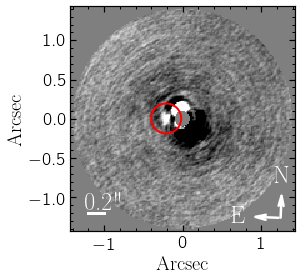

In [4]:
file = 'A_klipcube_BDI1350_box90_Kklip5-10-15-20-30-40_im3_om90_2021-8-19.fit'
im = fits.getdata(file)

pixscale = 0.0159 #arcsec/pix
arcsec_in_pixels = 1/pixscale

box = 90
center = [box,box]
extent = np.array([-center[0], center[0], -center[1], center[1]]) * 0.0159

pixscale = 0.0159 #arcsec/pix

%matplotlib inline
i = 3
plt.imshow(im[i], norm = ImageNormalize(im[i], interval=ZScaleInterval(),),
          extent = extent)
x = -1.2
y = -1.2
dx = 0.2
plt.plot([x,x+dx],[y,y], color='w', lw=3)
plt.annotate('0.2"', xy=(x-0.04, y+0.05), color='w', fontsize=25)
x,y = -0.21,0.005
plt.scatter(x,y,marker='o',facecolors='None',edgecolors='red',lw=2, s=900)

plt.annotate('N',
                    xy=(0.935,0.052), xycoords='axes fraction',
                    xytext=(0.905,0.22), textcoords='axes fraction',
                    arrowprops=dict(arrowstyle="<-, head_width=0.1", color='white', lw=2.5), color='white', 
                     fontsize = 25)
plt.annotate('E',
                xy=(0.935,0.06), xycoords='axes fraction',
                xytext=(0.935-0.22,0.04), textcoords='axes fraction',
                arrowprops=dict(arrowstyle="<-, head_width=0.1", color='white', lw=2.5), color='white', 
                 fontsize = 25)

plt.xlabel("Arcsec")
plt.ylabel("Arcsec")
plt.tight_layout()
#plt.savefig('bdi-reduced-A.png',dpi=300,bbox_inches='tight')